# Setting Our Work Envirement

In [1]:
#Importing Necessary Libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 
plt.style.use('ggplot')

In [14]:
#Importing Our Dataset
df=pd.read_csv(r'..\Dataset\Reviews.csv')

# Exploratory Data Analysis

In [15]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
#Performing Summary Statistics 
def data_assessment(data):
    """
    Performs data assessment by displaying the first few rows of the data, its shape, 
    summary statistics, and information about the data types and missing values.
    """
    print("Data Assessment: \n")
    data.head()
    print("Shape:", data.shape)
    print("Summary Statistics: \n")
    data.describe()
    print("Data Types and Missing Values: \n")
    data.info()
    
data_assessment(df)

Data Assessment: 

Shape: (568454, 10)
Summary Statistics: 

Data Types and Missing Values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [17]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

##### !!! We Have Missing values so we need to perform data cleaning to the dataset

In [18]:
#Cleaning the data 
def data_cleaning(data):
    """
    Performs data cleaning by removing duplicates and missing values.
    """
    print("Data Cleaning \n ")
    data.drop_duplicates(inplace=True)
    data.dropna(inplace=True)
    print('End of Data Cleaning ')
data_cleaning(df)

Data Cleaning 
 
End of Data Cleaning 


In [19]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

##### Now we have a cleaned dataset , it is time to perform some Data Visualization

# **Data Visualisation**

##### Bar Chart - Score Distribution: 
A bar chart can help visualize the distribution of review scores. You can plot the number of reviews for each score (1 to 5) on the y-axis against the respective score on the x-axis.

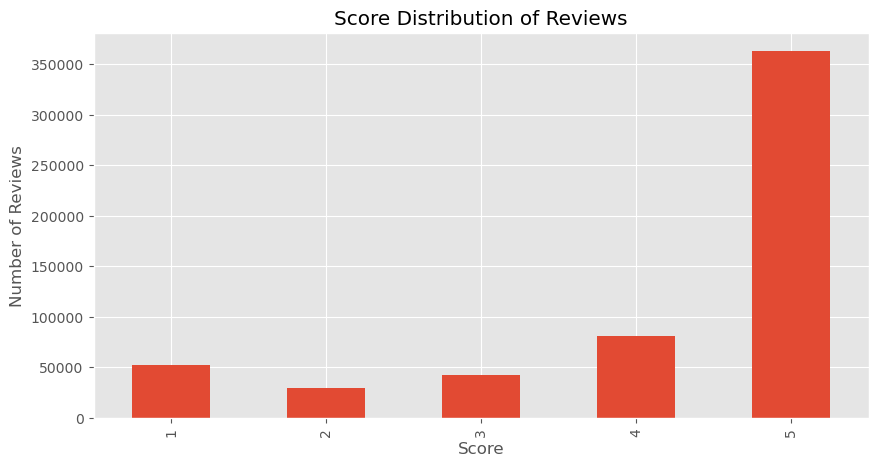

In [20]:
#Count of Customers Reviews By Stars
df['Score'].value_counts().sort_index().plot(
    kind='bar',
    xlabel="Score",
    ylabel="Number of Reviews",
    title='Score Distribution of Reviews',
    figsize=(10, 5)
);


#### Helpful vs. Unhelpful Reviews:
Create a pie chart to show the proportion of helpful and unhelpful reviews based on the "HelpfulnessNumerator" and "HelpfulnessDenominator" columns.

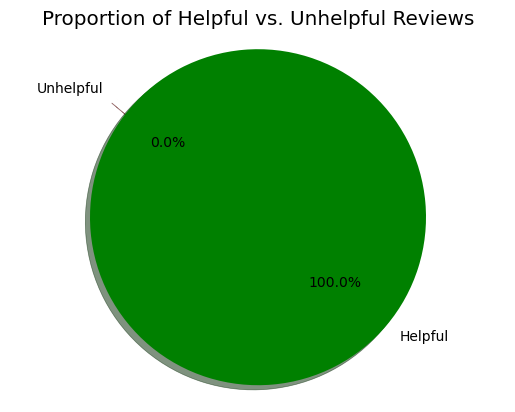

In [21]:
# Calculate the count of helpful and unhelpful reviews
helpful_count = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']].shape[0]
unhelpful_count = df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']].shape[0]

# Data for the pie chart
labels = ['Helpful', 'Unhelpful']
sizes = [helpful_count, unhelpful_count]
colors = ['green', 'red']
explode = (0.1, 0)  # Explode the first slice (Helpful) to stand out

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add a title
plt.title('Proportion of Helpful vs. Unhelpful Reviews')

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

#### Time Series Line Chart - Reviews Over Time:
see the trend of reviews over time. 

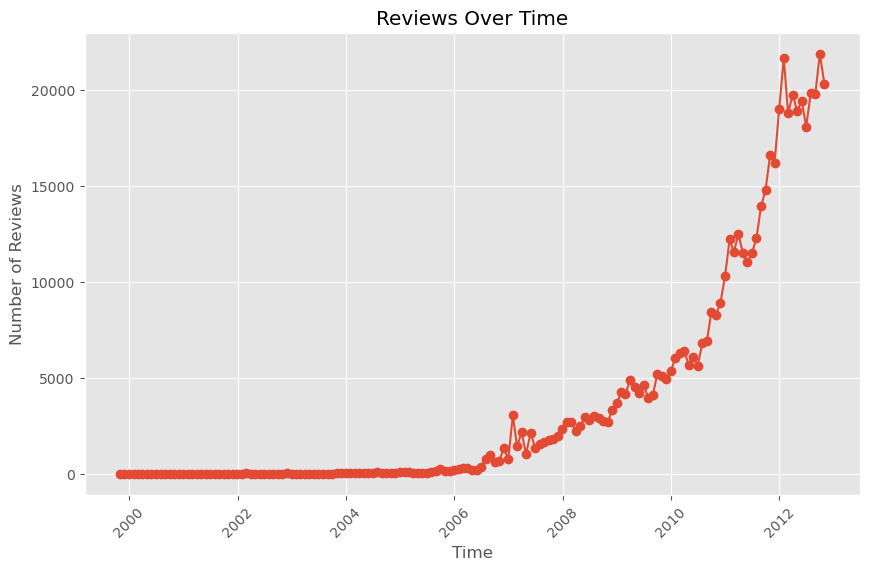

In [22]:
# Convert the "Time" column to a pandas datetime object (if it's not already in datetime format)
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Group the reviews by month (you can also use 'Y' for year)
reviews_by_month = df.resample('M', on='Time').size()

# Create the time series line chart
plt.figure(figsize=(10, 6))
plt.plot(reviews_by_month.index, reviews_by_month, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Reviews Over Time')
plt.grid(True)
plt.xticks(rotation=45)

# Display the time series line chart
plt.show()

#### Histogram - Review Text Length:
Plot a histogram of the review text lengths to understand the distribution of review lengths. This can provide insights into the typical length of reviews.

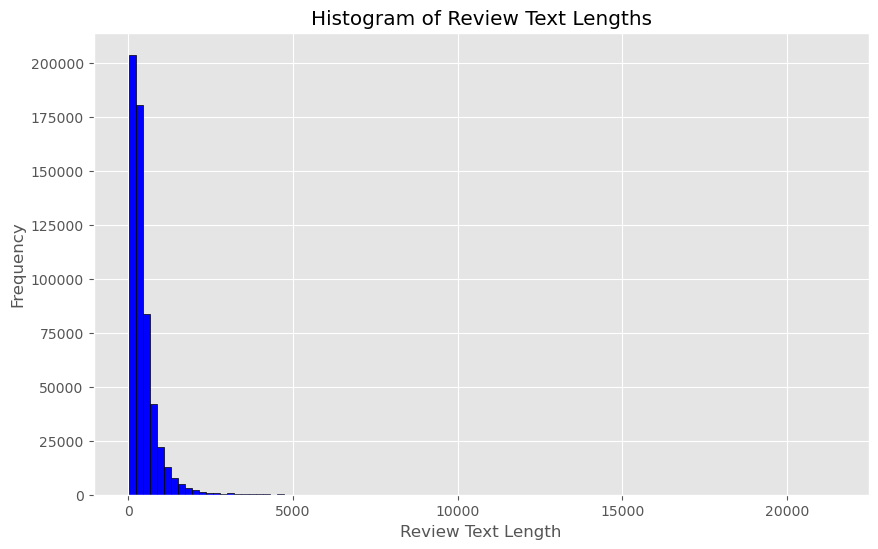

In [23]:
df['TextLength'] = df['Text'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['TextLength'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Review Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Text Lengths')
plt.grid(True)

# Display the histogram
plt.show()

#### Stacked Bar Chart - Review Score by Helpfulness:
Create a stacked bar chart to visualize the distribution of review scores (1 to 5) based on the helpfulness of the reviews.

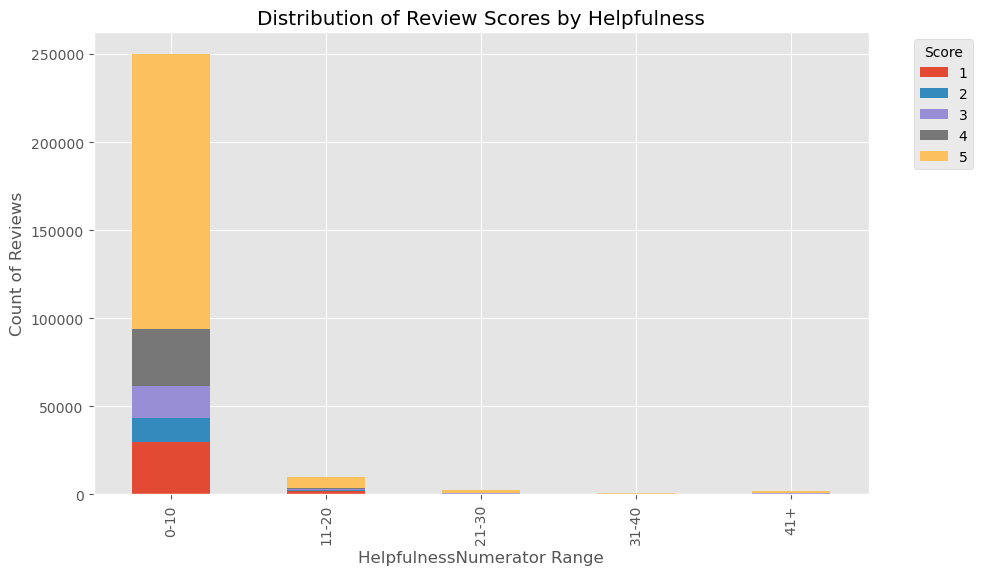

In [24]:
# Define the bins for HelpfulnessNumerator ranges
bins = [0, 10, 20, 30, 40, float('inf')]
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41+']

# Categorize the reviews based on HelpfulnessNumerator ranges
df['HelpfulnessRange'] = pd.cut(df['HelpfulnessNumerator'], bins=bins, labels=bin_labels)

# Group by HelpfulnessRange and Score, then count the occurrences
score_counts = df.groupby(['HelpfulnessRange', 'Score']).size().unstack().fillna(0)

# Create the stacked bar chart
ax = score_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('HelpfulnessNumerator Range')
plt.ylabel('Count of Reviews')
plt.title('Distribution of Review Scores by Helpfulness')

# Show the legend
plt.legend(title='Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the stacked bar chart
plt.show()

#### Scatter Plot - Helpfulness vs. Review Length:
create a scatter plot to examine if there's any correlation between the review length and its helpfulness.

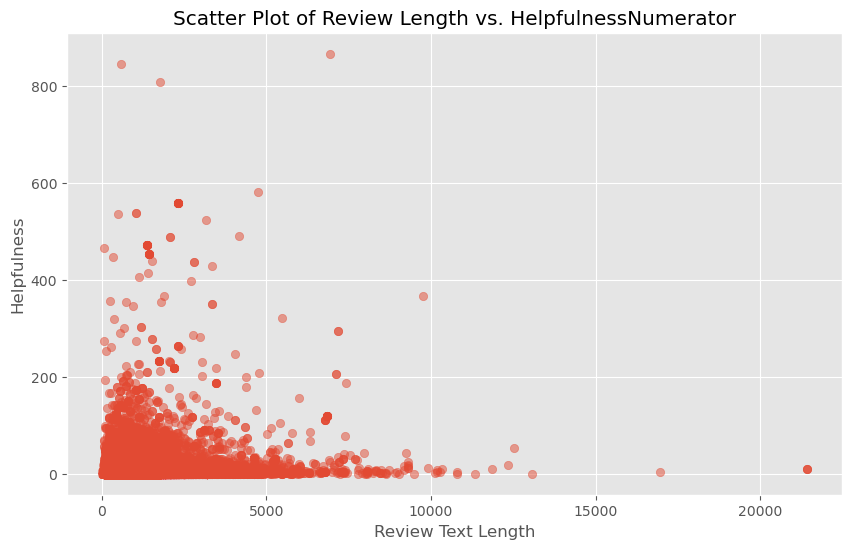

In [25]:
# Calculate the length of each review text and add it as a new column 'TextLength'
df['TextLength'] = df['Text'].apply(len)

# Choose the column for the helpfulness (either 'HelpfulnessNumerator' or 'HelpfulnessDenominator')
helpfulness_column = 'HelpfulnessNumerator'

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['TextLength'], df[helpfulness_column], alpha=0.5)
plt.xlabel('Review Text Length')
plt.ylabel('Helpfulness')
plt.title(f'Scatter Plot of Review Length vs. {helpfulness_column}')
plt.grid(True)

# Display the scatter plot
plt.show()

#### Word Cloud - Most Frequent Words in Review Summary:
Generate a word cloud from the "Summary" column to visually represent the most frequently occurring words in the review summaries.

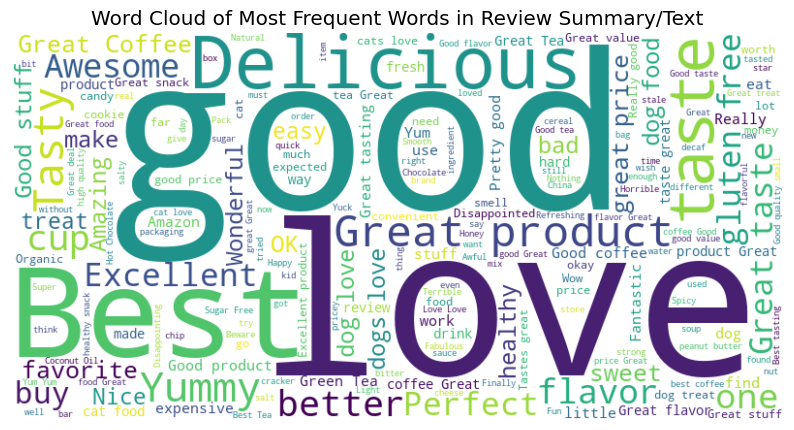

<Figure size 640x480 with 0 Axes>

In [27]:
from wordcloud import WordCloud
# Concatenate all the review summaries/texts into a single string
# You can choose either 'Summary' or 'Text' column here
text = ' '.join(df['Summary'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis ticks and labels
plt.title('Word Cloud of Most Frequent Words in Review Summary/Text')
plt.show()
plt.savefig('wordcloud.png')

#### Stacked Area Chart - Cumulative Helpful Reviews:
Create a stacked area chart to visualize the cumulative number of helpful reviews over time. This can help observe the growth in helpful reviews over the dataset's time span.

C:\Users\Firas\AppData\Local\Temp\ipykernel_12380\3574144626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helpful_reviews_cumulative['CumulativeHelpful'] = helpful_reviews_cumulative['HelpfulnessNumerator'].cumsum()


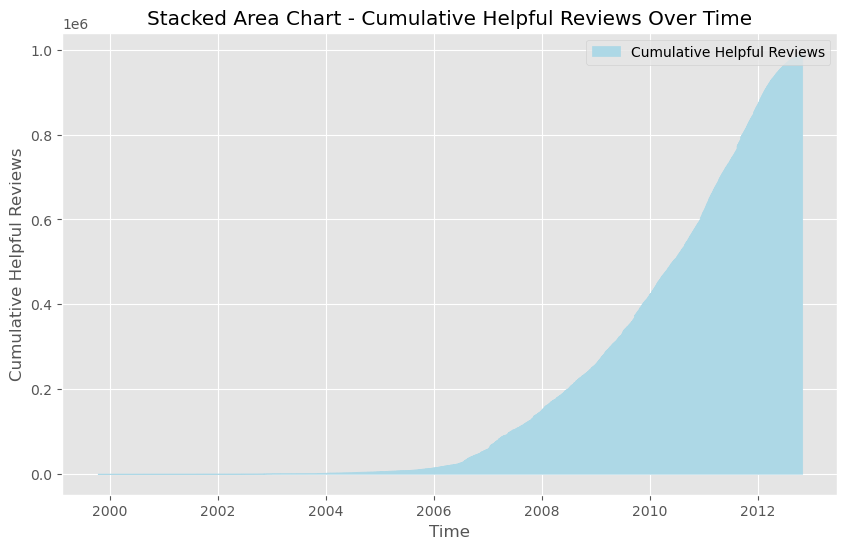

In [28]:
# Convert the "Time" column to a pandas datetime object (if it's not already in datetime format)
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Sort the DataFrame by the "Time" column in ascending order
df.sort_values(by='Time', inplace=True)

# Create a new DataFrame with the cumulative count of helpful reviews
helpful_reviews_cumulative = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]
helpful_reviews_cumulative['CumulativeHelpful'] = helpful_reviews_cumulative['HelpfulnessNumerator'].cumsum()

# Create the stacked area chart
plt.figure(figsize=(10, 6))
plt.fill_between(helpful_reviews_cumulative['Time'], helpful_reviews_cumulative['CumulativeHelpful'],
                 color='lightblue', label='Cumulative Helpful Reviews')
plt.xlabel('Time')
plt.ylabel('Cumulative Helpful Reviews')
plt.title('Stacked Area Chart - Cumulative Helpful Reviews Over Time')
plt.legend()
plt.grid(True)

# Display the stacked area chart
plt.show()

In [29]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextLength,HelpfulnessRange
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...,375,NaN
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,1999-10-25,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,407,0-10
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,5,1999-12-02,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,166,NaN
230284,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",222,0-10
451877,451878,B00004CXX9,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",222,0-10


In [30]:
df.isnull().sum()

Id                             0
ProductId                      0
UserId                         0
ProfileName                    0
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Score                          0
Time                           0
Summary                        0
Text                           0
TextLength                     0
HelpfulnessRange          303813
dtype: int64

In [31]:
df.drop(columns=('HelpfulnessRange'))

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextLength
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...,375
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,1999-10-25,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,407
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,5,1999-12-02,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,166
230284,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",222
451877,451878,B00004CXX9,A344SMIA5JECGM,Vincent P. Ross,1,2,5,1999-12-06,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",222
...,...,...,...,...,...,...,...,...,...,...,...
504113,504114,B001M0AKE8,A07112861KSNE1D0ZA1NO,Canon Fan,0,0,4,2012-10-26,Quaker Instant Oatmeal Dinosaur Eggs,This has been a firm favorite at breakfast tim...,163
506493,506494,B0006UFY46,AEEVDQNVIH4SJ,Eugene M. Watson,0,0,5,2012-10-26,Great Salmon,This Salmon Is The Best! I Try To Make A Smal...,150
401353,401354,B000CQG8B2,A26DOVGY14V7NX,Richard Rollins,0,0,5,2012-10-26,breakfast tea,We switch to this decaf tea at night for a gre...,112
83328,83329,B005ZBZLT4,A308RR8J9NJOOZ,Josh,0,0,5,2012-10-26,One of the best!,I am recently new to the Keurig world. I've t...,279


In [32]:
df.to_csv('..\Dataset\Reviews_clean.csv')